# United Airlines Hackathon


## About the data
Various studies suggest that airline F&B service has a significant impact on customer experience and loyalty generation. F&B is also one of the key concerns of unhappy customers as captured in their feedback forms. We have spent the last few years focusing on improving F&B service by partnering with global & regional vendors, encouraging customers to prebook their meals wherever applicable and improving forecasts for inventory. However, with constant network expansion plans and evolving demand, this continues to be an area of focus. Customers who pre-order their meals have a better satisfaction rate compared to those who do not. However, a small fraction of travelers prebook meals at this point.

Meal options can vary by market and haul type (Haul type is defined based on how long the flight is based on duration/miles). Some short haul markets (specially <500 miles) would not offer any meal-service which can be of concern specially for customers with multiple connections.

United uses a hub-and-spoke model to connect passengers between different cities. In a hub-and-spoke model, there is a central airport, called the hub, that serves as a connecting point for flights to and from other airports, called spokes. This helps in consolidating traffic from multiple spokes into the hub, and then flying larger aircraft on the hub-to-hub routes and can lead to lower operating costs for airlines. However, from the perspective of Inflight service, hub-spoke model can result in better customer experience on hub flights compared to spoke flights.

## How F&B satisfaction is calculated
United measures F&B satisfaction using our NPS (Net Promoter Score) survey. Customers are asked - How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]? Customers can score between 0-5 and can also provide additional feedback under - Is there anything else you would like to share about the food & beverage served on your flight from [CITY] to [CITY]?

% Inflight Satisfaction = Satisfied Sample/Total Sample*100

Satisfied Sample = Score is either 4 or 5 (Score ranges from 0-5)

### Calling Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
is_inventory_df = pd.read_csv("/content/Inflight Service_Inventory data.csv")
is_pre_order_df = pd.read_csv("/content/Inflight Service_Pre order data.csv",usecols = ['flight_number','departure_station_code','arrival_station_code','scheduled_departure_dtl','record_locator','meal_short_description',\
                                                                                        'meal_group','meal_category','carrier_code','cabin_code','meal_description','is_entree','pre_order_qty'])
customer_comments_df = pd.read_csv("/content/Survey data _Customer comments.csv")
satisfaction_score_df = pd.read_csv("/content/Survey data_Inflight Satisfaction Score.csv")

## understanding inventort dataset

In [ ]:
is_inventory_df.head()

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,9/1/2022,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,9/1/2022,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,9/2/2022,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,9/4/2022,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,9/8/2022,60549,Vegetarian chili and polenta cake,V,1,0


In [ ]:
is_inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_number            61267 non-null  int64 
 1   departure_station_code   61267 non-null  object
 2   arrival_station_code     61267 non-null  object
 3   scheduled_departure_dtl  61267 non-null  object
 4   entree_product_id        61267 non-null  int64 
 5   entree_description       61267 non-null  object
 6   entree_code              61267 non-null  object
 7   planned_entree_count     61267 non-null  int64 
 8   consumed_entree_count    61267 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.2+ MB


In [ ]:
is_inventory_df['scheduled_departure_dtl'] = pd.to_datetime(is_inventory_df['scheduled_departure_dtl'])

In [ ]:
top_10_entree = is_inventory_df['entree_code'].value_counts()[:10]
top_10_entree

V     17771
C     13923
O      6974
B      6655
WF     5942
E      2855
OM     2111
FT     1983
FB      535
VG      439
Name: entree_code, dtype: int64

In [ ]:
(is_inventory_df.groupby(['entree_code']).sum()['planned_entree_count'].sort_values(ascending = False) - is_inventory_df.groupby(['entree_code']).sum()['consumed_entree_count'].sort_values(ascending = False)).sort_values(ascending = False)

<ipython-input-8-9f720bef0de9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (is_inventory_df.groupby(['entree_code']).sum()['planned_entree_count'].sort_values(ascending = False) - is_inventory_df.groupby(['entree_code']).sum()['consumed_entree_count'].sort_values(ascending = False)).sort_values(ascending = False)
<ipython-input-8-9f720bef0de9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (is_inventory_df.groupby(['entree_code']).sum()['planned_entree_count'].sort_values(ascending = False) - is_inventory_df.groupby(['entree_code']).sum()['consumed_entree_count'].sort_values(ascending = False)).sort_va

entree_code
C     86625
V     63076
O     35637
WF    31985
B     16130
E      8284
FT     4000
OM     3491
P      2361
O2     1155
FB      714
BR      656
S       557
S2      478
S1      318
VG      295
F       253
AV      252
GF      234
PK      219
KS      217
E2      143
E1      122
SF       24
V2       21
C2       15
C3       11
C1       11
TK        4
PC        3
ZD        2
V1        0
dtype: int64

In [ ]:
satisfaction_score_df.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24.0,Early & Ontime,Economy,Economy,Domestic,2.0,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67.0,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,10.0,Delayed,Business,NaN,Domestic,2.0,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72.0,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-8.0,Early & Ontime,Business,NaN,Domestic,2.0,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72.0,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11.0,Early & Ontime,Economy,Economy,Domestic,3.0,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72.0,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,18.0,Delayed,Business,NaN,Domestic,2.0,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72.0,Short,B24,3,Domestic,member,PANASONIC,hub departure


## Data formatting

In [ ]:
satisfaction_score_df.columns

Index(['flight_number', 'origin_station_code', 'destination_station_code',
       'record_locator', 'scheduled_departure_date', 'question_text', 'score',
       'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2',
       'arrival_delay_minutes', 'arrival_delay_group', 'cabin_code_desc',
       'cabin_name', 'entity', 'number_of_legs', 'seat_factor_band',
       'loyalty_program_level', 'generation', 'fleet_type_description',
       'fleet_usage', 'equipment_type_code', 'ua_uax', 'actual_flown_miles',
       'haul_type', 'departure_gate', 'arrival_gate',
       'international_domestic_indicator', 'response_group', 'media_provider',
       'hub_spoke'],
      dtype='object')

In [ ]:
numeric_columns = ['flight_number','score','number_of_legs','arrival_delay_minutes','actual_flown_miles']

### finding out important features affecting satisfaction score

In [ ]:
try:
  satisfaction_score_df[numeric_columns] = satisfaction_score_df[numeric_columns].apply(pd.to_numeric)
except:
  print(satisfaction_score_df.index)
# satisfaction_score_df[numeric_columns] = satisfaction_score_df[numeric_columns].apply(pd.to_numeric)

RangeIndex(start=0, stop=13615, step=1)


In [ ]:
# satisfaction_score_df[['cabin_code_desc','score']]
# Here some customers have mentioned chicken entree as score which can alter our results so we have to drop those reviews
# satisfaction_score_df.drop(satisfaction_score_df[satisfaction_score_df['score'] not in [1,2,3,4,5].index,inplace = True)

In [ ]:
satisfaction_score_df.score

0                     2
1                     5
2                     5
3                     3
4                     5
              ...      
13610                 4
13611                 5
13612    chicken entrée
13613       beef entrée
13614               NaN
Name: score, Length: 13615, dtype: object

In [ ]:
satisfaction_score_df = satisfaction_score_df[satisfaction_score_df['score'].isin(['1','2','3','4','5'])]
satisfaction_score_df.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24.0,Early & Ontime,Economy,Economy,Domestic,2.0,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67.0,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,10.0,Delayed,Business,NaN,Domestic,2.0,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72.0,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-8.0,Early & Ontime,Business,NaN,Domestic,2.0,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72.0,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11.0,Early & Ontime,Economy,Economy,Domestic,3.0,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72.0,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,18.0,Delayed,Business,NaN,Domestic,2.0,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72.0,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [ ]:
print(satisfaction_score_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10168 entries, 0 to 13611
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   flight_number                     10168 non-null  int64  
 1   origin_station_code               10168 non-null  object 
 2   destination_station_code          10168 non-null  object 
 3   record_locator                    10168 non-null  object 
 4   scheduled_departure_date          10168 non-null  object 
 5   question_text                     10168 non-null  object 
 6   score                             10168 non-null  object 
 7   satisfaction_type                 10168 non-null  object 
 8   driver_sub_group1                 10168 non-null  object 
 9   driver_sub_group2                 10168 non-null  object 
 10  arrival_delay_minutes             10168 non-null  float64
 11  arrival_delay_group               10168 non-null  object 
 12  cabi

In [ ]:
satisfaction_score_df['scheduled_departure_date'] = pd.to_datetime(satisfaction_score_df['scheduled_departure_date'])

<ipython-input-17-7d8299933e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_score_df['scheduled_departure_date'] = pd.to_datetime(satisfaction_score_df['scheduled_departure_date'])


In [ ]:
satisfaction_score_df.score = satisfaction_score_df.score.apply(pd.to_numeric)

In [ ]:
satisfaction_score_df.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,2022-09-01,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-24.0,Early & Ontime,Economy,Economy,Domestic,2.0,80+,NaN,Gen X,CRJ-200,Express,CRZ,UAX,67.0,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,10.0,Delayed,Business,NaN,Domestic,2.0,90+,premier platinum,Boomer,ERJ-175,Express,E75,UAX,72.0,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,-8.0,Early & Ontime,Business,NaN,Domestic,2.0,90+,premier platinum,Gen X,ERJ-175,Express,E75,UAX,72.0,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,2022-09-01,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-11.0,Early & Ontime,Economy,Economy,Domestic,3.0,90+,non-elite,Boomer,CRJ-200,Express,CRJ,UAX,72.0,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,18.0,Delayed,Business,NaN,Domestic,2.0,90+,premier silver,Boomer,A319-100,Mainline,19F,UA,72.0,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [ ]:
# satisfaction_score_df['arrival_delay_group'].value_counts()
satisfaction_score_df = satisfaction_score_df[satisfaction_score_df['arrival_delay_group']!= 'THALES']

In [ ]:
# satisfaction_score_df['generation'].value_counts()
satisfaction_score_df = satisfaction_score_df[(satisfaction_score_df['generation']!= 'NBK') & (satisfaction_score_df['generation']!= 'Greatest')]

In [ ]:
# satisfaction_score_df['ua_uax'].value_counts()
# satisfaction_score_df['haul_type'].value_counts()
# satisfaction_score_df['international_domestic_indicator'].value_counts()
# satisfaction_score_df['response_group'].value_counts()
# satisfaction_score_df['hub_spoke'].value_counts()
# satisfaction_score_df['entity'].value_counts()
# satisfaction_score_df['driver_sub_group1'].value_counts()
# satisfaction_score_df['fleet_usage'].value_counts()
# satisfaction_score_df['response_group'].value_counts()

In [ ]:
important_columns = ['flight_number','cabin_code_desc','generation','ua_uax','haul_type','international_domestic_indicator',\
    'response_group','hub_spoke','entity','scheduled_departure_date','fleet_usage','score']

In [ ]:
new_score_df = satisfaction_score_df[important_columns]

In [ ]:
columns= ['cabin_code_desc', 'generation', 'ua_uax', 'haul_type',
       'international_domestic_indicator', 'response_group', 'hub_spoke',
       'entity', 'fleet_usage']

In [ ]:
for i in columns:
  print(new_score_df[i])

0         Economy
1        Business
2        Business
3         Economy
4        Business
           ...   
13606     Economy
13607    Business
13609     Economy
13610    Business
13611     Economy
Name: cabin_code_desc, Length: 10166, dtype: object
0             Gen X
1            Boomer
2             Gen X
3            Boomer
4            Boomer
            ...    
13606    Millennial
13607         Gen X
13609         Gen X
13610         Gen X
13611    Millennial
Name: generation, Length: 10166, dtype: object
0        UAX
1        UAX
2        UAX
3        UAX
4         UA
        ... 
13606     UA
13607     UA
13609     UA
13610     UA
13611     UA
Name: ua_uax, Length: 10166, dtype: object
0        Short
1        Short
2        Short
3        Short
4        Short
         ...  
13606     Long
13607     Long
13609     Long
13610     Long
13611     Long
Name: haul_type, Length: 10166, dtype: object
0             Domestic
1             Domestic
2             Domestic
3             Dom

In [ ]:
new_score_df_2 = pd.DataFrame()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in columns:
  new_score_df_2[i] = label_encoder.fit_transform(new_score_df[i].values)

In [ ]:
# for i in columns:
#   label_encoder.inverse_transform(new_score_df_2[i])
new_score_df_2['score'] = new_score_df['score']
new_score_df_2['flight_number'] = new_score_df['flight_number']

In [ ]:
new_score_df

,flight_number,cabin_code_desc,generation,ua_uax,haul_type,international_domestic_indicator,response_group,hub_spoke,entity,scheduled_departure_date,fleet_usage,score
0,3802,Economy,Gen X,UAX,Short,Domestic,non-member,spoke departure,Domestic,2022-09-01,Express,2
1,4645,Business,Boomer,UAX,Short,Domestic,member,spoke departure,Domestic,2022-09-01,Express,5
2,5236,Business,Gen X,UAX,Short,Domestic,member,spoke departure,Domestic,2022-09-01,Express,5
3,4686,Economy,Boomer,UAX,Short,Domestic,member,hub departure,Domestic,2022-09-01,Express,3
4,671,Business,Boomer,UA,Short,Domestic,member,hub departure,Domestic,2022-09-01,Mainline,5
...,...,...,...,...,...,...,...,...,...,...,...,...
13606,19,Economy,Millennial,UA,Long,International,non-member,spoke departure,Atlantic,2022-09-09,Mainline,5
13607,19,Business,Gen X,UA,Long,International,member,spoke departure,Atlantic,2022-09-09,Mainline,5
13609,20,Economy,Gen X,UA,Long,International,non-member,hub departure,Atlantic,2022-09-09,Mainline,1
13610,31,Business,Gen X,UA,Long,International,member,hub departure,Atlantic,2022-09-09,Mainline,4


In [ ]:
new_score_df.loc[new_score_df['score'] <4 , 'satisfied'] = "No"
new_score_df.loc[new_score_df['score'] >=4 , 'satisfied'] = "Yes"

<ipython-input-30-a5dd07210890>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_score_df.loc[new_score_df['score'] <4 , 'satisfied'] = "No"


<Axes: xlabel='generation'>

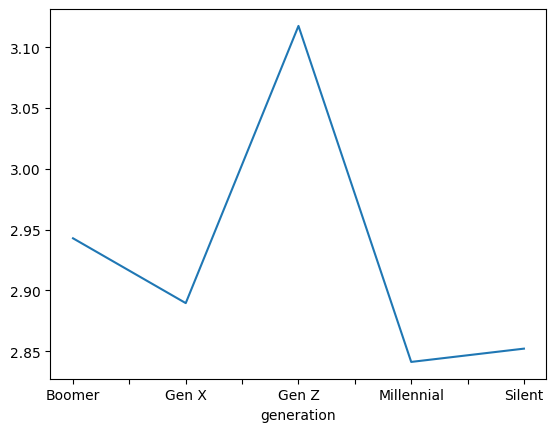

In [ ]:
new_score_df.groupby('generation').mean('score')['score'].plot()

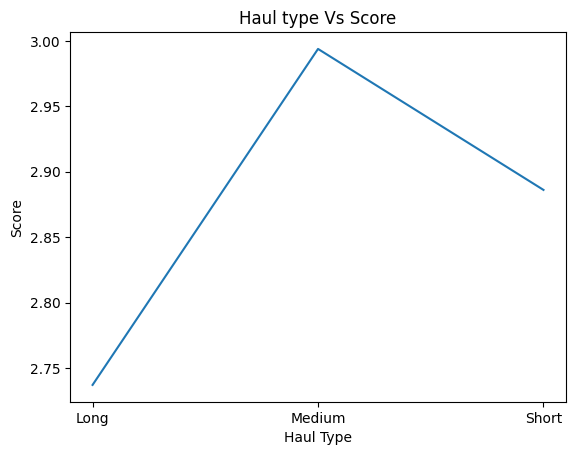

In [ ]:
sns.lineplot(new_score_df.groupby('haul_type').mean('score')['score'].reset_index(),x = 'haul_type',y = 'score', markers = True).set(title = 'Haul type Vs Score')
plt.ylabel('Score')
plt.xlabel('Haul Type')
plt.show()

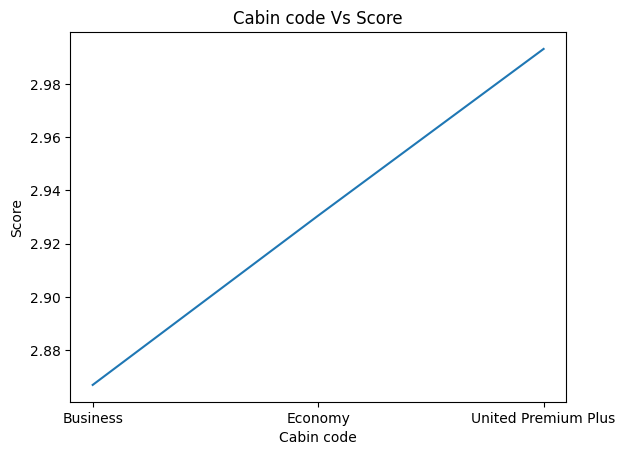

In [ ]:
sns.lineplot(new_score_df.groupby('cabin_code_desc').mean('score')['score'].reset_index(),x = 'cabin_code_desc',y = 'score', markers = True).set(title = 'Cabin code Vs Score')
plt.ylabel('Score')
plt.xlabel('Cabin code')
plt.show()

In [ ]:
new_score_df.groupby('cabin_code_desc').mean('score')['score'].reset_index()

,cabin_code_desc,score
0,Business,2.866896
1,Economy,2.930529
2,United Premium Plus,2.993197


Text(0.5, 1.0, 'Haul type with satisfaction')

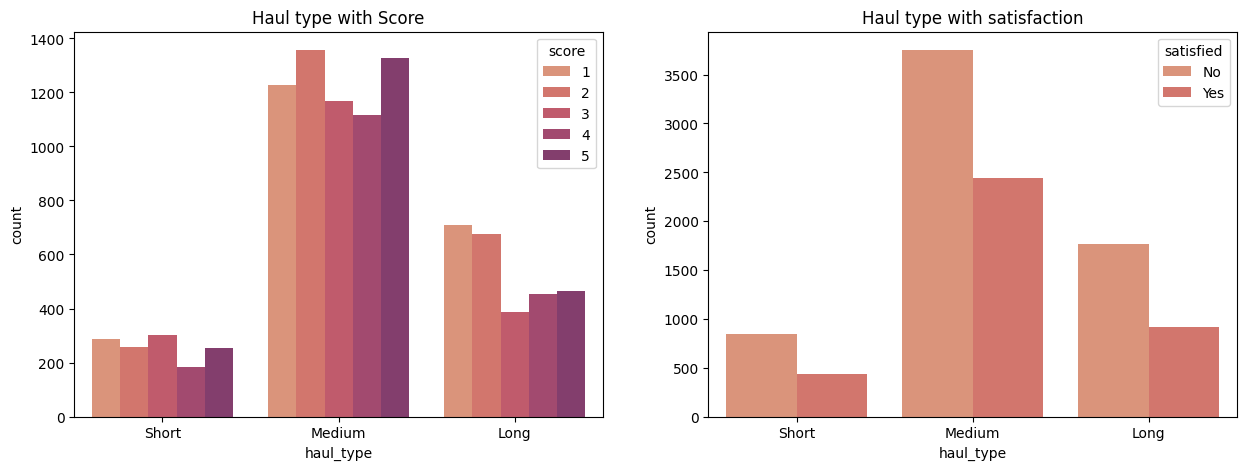

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

sns.countplot( new_score_df, x = 'haul_type', hue = 'score', palette = sns.color_palette("flare"),ax = axes[0] )
axes[0].set_title('Haul type with Score')

sns.countplot( new_score_df, x = 'haul_type', hue = 'satisfied', palette = sns.color_palette("flare"),ax = axes[1])
axes[1].set_title('Haul type with satisfaction')

Text(0.5, 1.0, 'Response group with satisfaction')

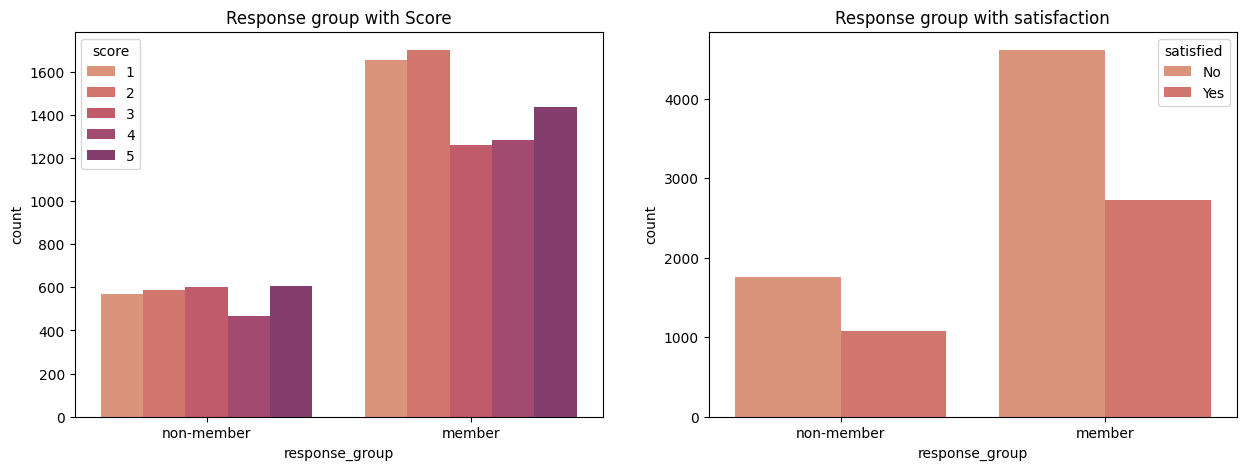

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

sns.countplot( new_score_df, x = 'response_group', hue = 'score', palette = sns.color_palette("flare"),ax = axes[0] )
axes[0].set_title('Response group with Score')

sns.countplot( new_score_df, x = 'response_group', hue = 'satisfied', palette = sns.color_palette("flare"),ax = axes[1])
axes[1].set_title('Response group with satisfaction')

Text(0.5, 1.0, 'Cabin Code with satisfaction')

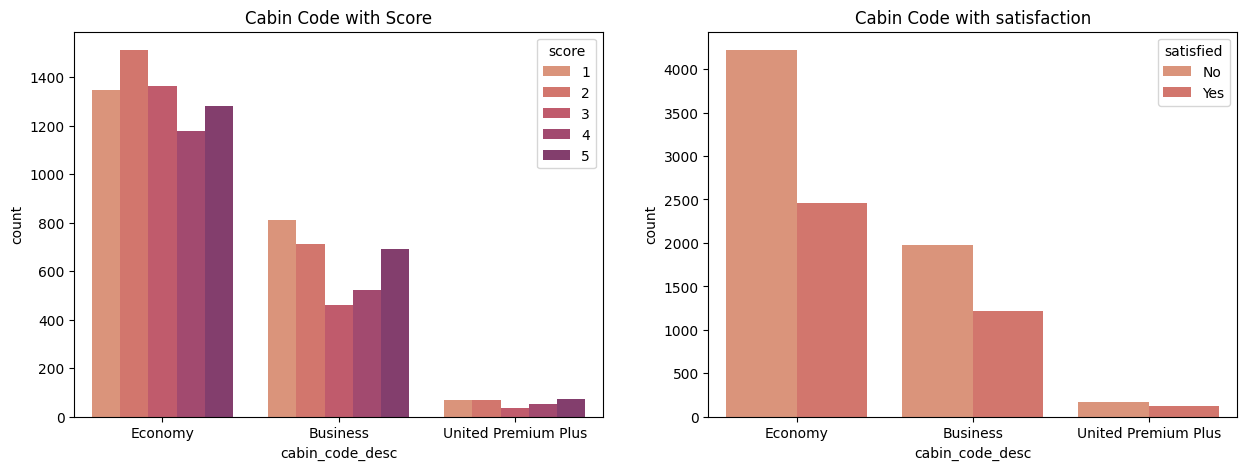

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

sns.countplot( new_score_df, x = 'cabin_code_desc', hue = 'score', palette = sns.color_palette("flare"),ax = axes[0] )
axes[0].set_title('Cabin Code with Score')

sns.countplot( new_score_df, x = 'cabin_code_desc', hue = 'satisfied', palette = sns.color_palette("flare"),ax = axes[1])
axes[1].set_title('Cabin Code with satisfaction')

Text(0.5, 1.0, 'Hub-Spoke with satisfaction')

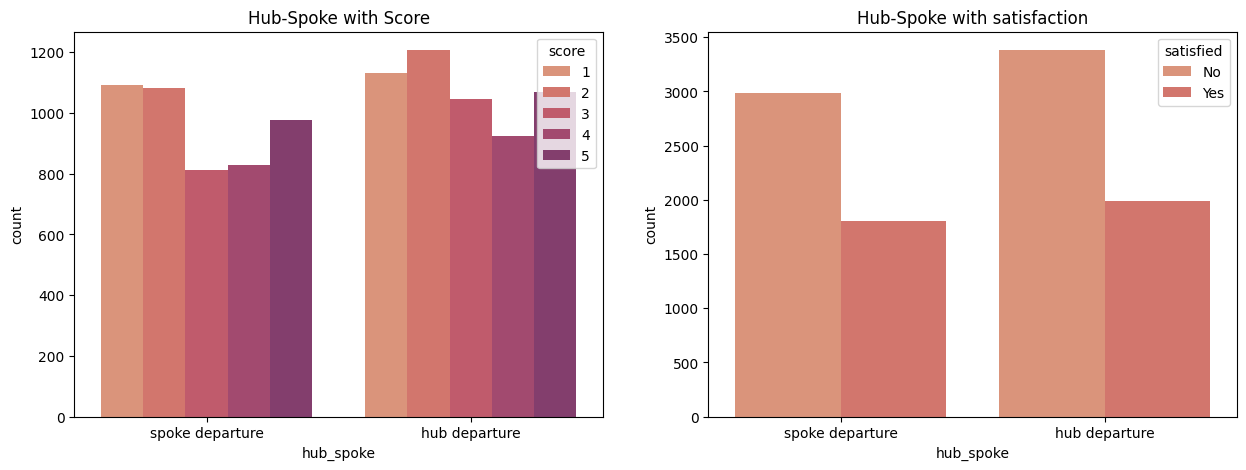

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

sns.countplot( new_score_df, x = 'hub_spoke', hue = 'score', palette = sns.color_palette("flare"),ax = axes[0] )
axes[0].set_title('Hub-Spoke with Score')

sns.countplot( new_score_df, x = 'hub_spoke', hue = 'satisfied', palette = sns.color_palette("flare"),ax = axes[1])
axes[1].set_title('Hub-Spoke with satisfaction')

Text(0.5, 1.0, 'Haul Type with satisfaction')

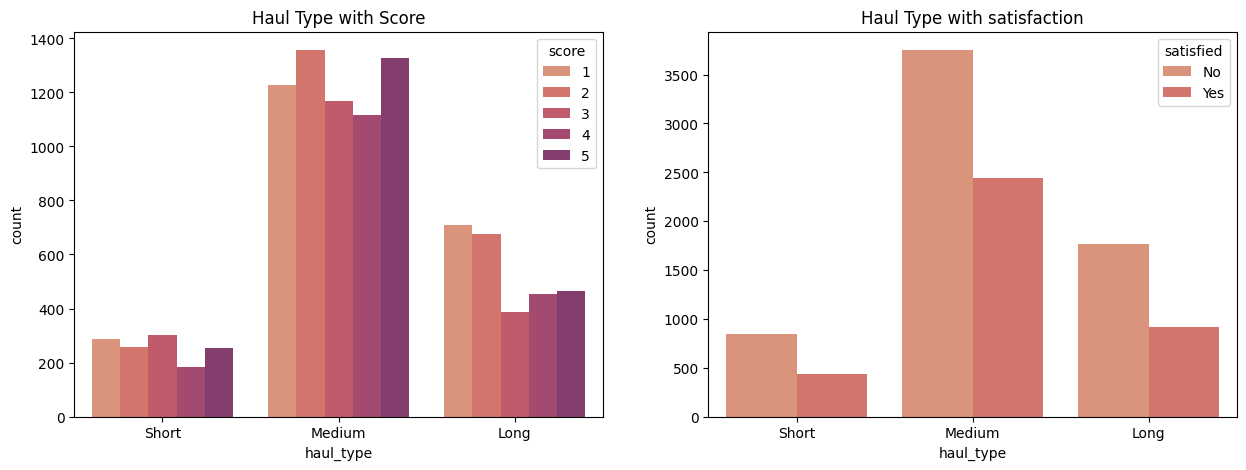

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (15,5))

sns.countplot( new_score_df, x = 'haul_type', hue = 'score', palette = sns.color_palette("flare"),ax = axes[0] )
axes[0].set_title('Haul Type with Score')

sns.countplot( new_score_df, x = 'haul_type', hue = 'satisfied', palette = sns.color_palette("flare"),ax = axes[1])
axes[1].set_title('Haul Type with satisfaction')

In [ ]:
customer_comments_df.reset_index(inplace = True)
customer_comments_df["index"] = customer_comments_df["index"] + 1
customer_comments_df.head()

,index,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group
0,1,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member
1,2,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member
2,3,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member
3,4,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member
4,5,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.2 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
pip install nltk

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# sia = SentimentIntensityAnalyzer()

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example,return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(customer_comments_df.iterrows(),total = len(customer_comments_df)):
    try:
        text = row['verbatim_text']
        myId = row['index']
        # vader_result = sia.polarity_scores(text)
        # vader_result_rename = {}
        # for key,value in vader_result.items():
        #     vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**roberta_result}
        res[myId] = both
    except RuntimeError:
        print(f'Broke for id {myId}')

  0%|          | 0/9424 [00:00<?, ?it/s]

Broke for id 1392


In [ ]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns = {'index' : 'index'})
result_df = result_df.merge(customer_comments_df, how = 'left')

In [ ]:
result_df.to_csv('NLP_Result.csv')

In [ ]:
result_df = pd.read_csv('NLP_Result.csv',index_col = 0)

In [ ]:
result_df.loc[result_df['roberta_pos'] > 0.4, 'satisfaction'] = 1
result_df.loc[result_df['roberta_pos'] < 0.4, 'satisfaction'] = 0

In [ ]:
result_df.satisfied = result_df.satisfaction.apply(pd.to_numeric)

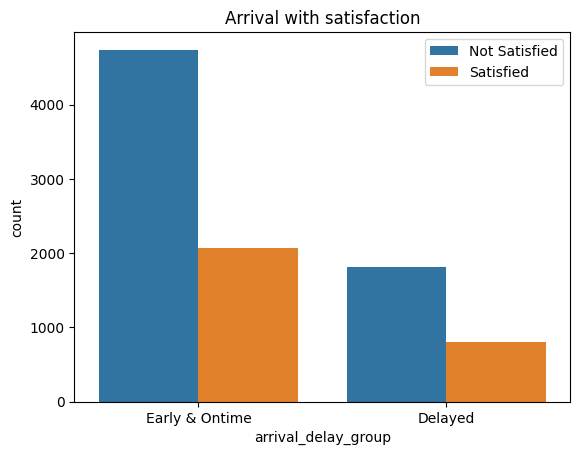

In [ ]:
sns.countplot( result_df, x = 'arrival_delay_group', hue = 'satisfaction', palette = sns.color_palette("tab10")).set_title('Arrival with satisfaction')
plt.legend(['Not Satisfied','Satisfied'])

In [ ]:
result_df.groupby('arrival_delay_group').mean('satisfaction')

,Unnamed: 0,index,roberta_neg,roberta_neu,roberta_pos,flight_number,satisfaction
arrival_delay_group,,,,,,,
Delayed,4733.607198,4735.469372,0.307512,0.373296,0.319192,1597.720138,0.306279
Early & Ontime,4702.330201,4704.178828,0.296425,0.380405,0.323170,1796.972838,0.304067


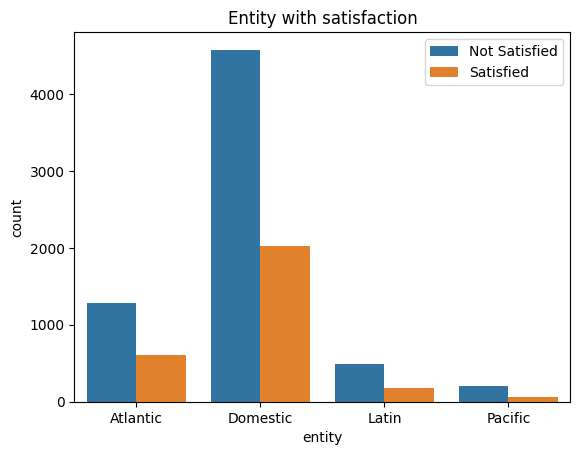

In [ ]:
sns.countplot( result_df, x = 'entity', hue = 'satisfaction', palette = sns.color_palette("tab10")).set_title('Entity with satisfaction')
plt.legend(['Not Satisfied','Satisfied'])

In [ ]:
result_df.groupby('entity').mean()

<ipython-input-52-52cb2c51d96f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_df.groupby('entity').mean()


,Unnamed: 0,index,roberta_neg,roberta_neu,roberta_pos,flight_number,satisfaction
entity,,,,,,,
Atlantic,4698.286850,4700.133086,0.342625,0.328384,0.328990,527.433192,0.320255
Domestic,4732.188230,4734.043228,0.288134,0.388323,0.323543,2183.894585,0.306082
Latin,4471.713864,4473.548673,0.276033,0.422300,0.301667,1313.998525,0.269912
Pacific,4885.883459,4887.759398,0.335199,0.376406,0.288395,482.631579,0.248120


In [ ]:
result_df['satisfaction'].value_counts()

0.0    6552
1.0    2871
Name: satisfaction, dtype: int64

In the above analysis, it can be seen that around 70% customers are not satisfied

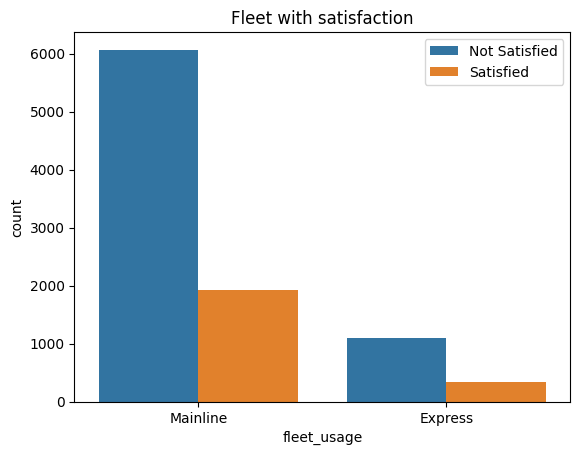

In [ ]:
sns.countplot( result_df, x = 'fleet_usage', hue = 'satisfied', palette = sns.color_palette("tab10")).set_title('Fleet with satisfaction')
plt.legend(['Not Satisfied','Satisfied'])

In [ ]:
is_inventory_df['difference_entree_count'] = is_inventory_df['planned_entree_count'] - is_inventory_df['consumed_entree_count']

In [ ]:
is_inventory_df.rename(columns = {'scheduled_departure_dtl':'scheduled_departure_date',\
                                  'departure_station_code' : 'origin_station_code',\
                                  'arrival_station_code': 'destination_station_code',},inplace = True)
is_inventory_df.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count,difference_entree_count
0,2634,IAX,PDX,2022-09-01,58019,Belgium waffle,WF,20,32,-12
1,2666,ORX,IAX,2022-09-01,60549,Vegetarian chili and polenta cake,V,3,0,3
2,2310,DEX,SAX,2022-09-02,58981,Scrambled eggs,O,9,7,2
3,1712,SFX,CLX,2022-09-04,58764,Mediterranean Falafel Bowl,V,1,0,1
4,1225,LAX,HNX,2022-09-08,60549,Vegetarian chili and polenta cake,V,1,0,1


In [ ]:
merge_1 = is_inventory_df.merge(satisfaction_score_df, on = ['flight_number','origin_station_code','destination_station_code','scheduled_departure_date'])
merge_1.head()

,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count,difference_entree_count,record_locator,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,arrival_delay_group,cabin_code_desc,cabin_name,entity,number_of_legs,seat_factor_band,loyalty_program_level,generation,fleet_type_description,fleet_usage,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,2310,DEX,SAX,2022-09-02,58981,Scrambled eggs,O,9,7,2,O2XXFR,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-30.0,Early & Ontime,Economy,Economy Plus,Domestic,1.0,90+,NaN,Boomer,B737-800,Mainline,73Y,UA,853.0,Medium,B9,43,Domestic,non-member,THALES,hub departure
1,2310,DEX,SAX,2022-09-02,58019,Belgium waffle,WF,5,5,0,O2XXFR,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-30.0,Early & Ontime,Economy,Economy Plus,Domestic,1.0,90+,NaN,Boomer,B737-800,Mainline,73Y,UA,853.0,Medium,B9,43,Domestic,non-member,THALES,hub departure
2,2310,DEX,SAX,2022-09-02,58563,Tomato and kale baked egg,E,2,0,2,O2XXFR,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,-30.0,Early & Ontime,Economy,Economy Plus,Domestic,1.0,90+,NaN,Boomer,B737-800,Mainline,73Y,UA,853.0,Medium,B9,43,Domestic,non-member,THALES,hub departure
3,1712,SFX,CLX,2022-09-04,58764,Mediterranean Falafel Bowl,V,1,0,1,I8XX2J,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-5.0,Early & Ontime,Business,NaN,Domestic,1.0,90+,NaN,Boomer,B737-800,Mainline,73Y,UA,2161.0,Medium,E5,C27,Domestic,non-member,THALES,hub departure
4,1712,SFX,CLX,2022-09-04,52133,Gluten-free Meal,GF,1,1,0,I8XX2J,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-5.0,Early & Ontime,Business,NaN,Domestic,1.0,90+,NaN,Boomer,B737-800,Mainline,73Y,UA,2161.0,Medium,E5,C27,Domestic,non-member,THALES,hub departure


In [ ]:
result_df['scheduled_departure_date'] = pd.to_datetime(result_df['scheduled_departure_date'])

In [ ]:
result_df.head()

,index,roberta_neg,roberta_neu,roberta_pos,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group,departure_delay_group,entity,verbatim_text,seat_factor_band,ques_verbatim_text,loyalty_program_level,fleet_type_description,fleet_usage,response_group,satisfaction
0,1,0.646469,0.337926,0.015606,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,There was no salad dressing. The staff informe...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B777-200,Mainline,member,0.0
1,2,0.508857,0.433899,0.057243,950,LHX,SFX,2022-09-01,Early & Ontime,Delayed,Atlantic,Not a choice.,0 to 70,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,0.0
2,3,0.006818,0.314178,0.679004,1876,FLX,EWX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More variety and bigger snacks.,90+,Is there anything else you'd like to share abo...,non-elite,A320-200,Mainline,member,1.0
3,4,0.949420,0.045766,0.004814,5469,SFX,SEX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Serving pretzels and cookies in first class wa...,90+,Is there anything else you'd like to share abo...,premier gold,ERJ-175,Express,member,0.0
4,5,0.009770,0.853294,0.136936,281,DEX,ANX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,More inflight selections to purchase for full ...,0 to 70,Is there anything else you'd like to share abo...,non-elite,B737-MAX8,Mainline,member,0.0


In [ ]:
merge_2 = result_df.merge(merge_1,on =  ['flight_number','origin_station_code','destination_station_code','scheduled_departure_date'])

In [ ]:
merge_2.columns

Index(['index', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'flight_number',
       'origin_station_code', 'destination_station_code',
       'scheduled_departure_date', 'arrival_delay_group_x',
       'departure_delay_group', 'entity_x', 'verbatim_text',
       'seat_factor_band_x', 'ques_verbatim_text', 'loyalty_program_level_x',
       'fleet_type_description_x', 'fleet_usage_x', 'response_group_x',
       'satisfaction', 'entree_product_id', 'entree_description',
       'entree_code', 'planned_entree_count', 'consumed_entree_count',
       'difference_entree_count', 'record_locator', 'question_text', 'score',
       'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2',
       'arrival_delay_minutes', 'arrival_delay_group_y', 'cabin_code_desc',
       'cabin_name', 'entity_y', 'number_of_legs', 'seat_factor_band_y',
       'loyalty_program_level_y', 'generation', 'fleet_type_description_y',
       'fleet_usage_y', 'equipment_type_code', 'ua_uax', 'actual_flown_miles',
    

In [ ]:
imp_columns = ['index', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'flight_number',
       'origin_station_code', 'destination_station_code',
       'scheduled_departure_date','arrival_delay_group_x',
       'departure_delay_group', 'entity_x','verbatim_text',
       'seat_factor_band_x', 'ques_verbatim_text', 'loyalty_program_level_x',
       'fleet_type_description_x', 'fleet_usage_x', 'response_group_x',
       'entree_product_id', 'entree_description', 'entree_code',
       'planned_entree_count', 'consumed_entree_count',
       'difference_entree_count', 'record_locator', 'question_text', 'score',
       'satisfaction_type', 'driver_sub_group1', 'driver_sub_group2',
       'arrival_delay_minutes','cabin_code_desc',
       'cabin_name','haul_type','international_domestic_indicator','hub_spoke','satisfaction']

In [ ]:
merge_2 = merge_2[imp_columns]

In [ ]:
merge_2.head()

,index,roberta_neg,roberta_neu,roberta_pos,flight_number,origin_station_code,destination_station_code,scheduled_departure_date,arrival_delay_group_x,departure_delay_group,entity_x,verbatim_text,seat_factor_band_x,ques_verbatim_text,loyalty_program_level_x,fleet_type_description_x,fleet_usage_x,response_group_x,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count,difference_entree_count,record_locator,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,arrival_delay_minutes,cabin_code_desc,cabin_name,haul_type,international_domestic_indicator,hub_spoke,satisfaction
0,6,0.004693,0.091537,0.90377,1726,SFX,OGX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Hot food options would be nice.,90+,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,58049,Cinnamon French toast,FT,16,0,16,GRXXGR,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-13.0,Business,NaN,Medium,Domestic,hub departure,1.0
1,6,0.004693,0.091537,0.90377,1726,SFX,OGX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Hot food options would be nice.,90+,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,58049,Cinnamon French toast,FT,16,0,16,H4XX25,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-13.0,Business,NaN,Medium,Domestic,hub departure,1.0
2,6,0.004693,0.091537,0.90377,1726,SFX,OGX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Hot food options would be nice.,90+,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,58049,Cinnamon French toast,FT,16,0,16,HMXXY0,How satisfied were you with the food & beverag...,4,Satisfied,food & beverage,food and beverage satisfaction,-13.0,Economy,Economy,Medium,Domestic,hub departure,1.0
3,6,0.004693,0.091537,0.90377,1726,SFX,OGX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Hot food options would be nice.,90+,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,57484,Tomato and kale baked egg,E,40,0,40,GRXXGR,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,-13.0,Business,NaN,Medium,Domestic,hub departure,1.0
4,6,0.004693,0.091537,0.90377,1726,SFX,OGX,2022-09-01,Early & Ontime,Early & Ontime,Domestic,Hot food options would be nice.,90+,Is there anything else you'd like to share abo...,NaN,B777-200,Mainline,non-member,57484,Tomato and kale baked egg,E,40,0,40,H4XX25,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,-13.0,Business,NaN,Medium,Domestic,hub departure,1.0


# Creating WordCloud based on comments of different attributes

In [ ]:
from wordcloud import WordCloud

In [ ]:
imp_series.values

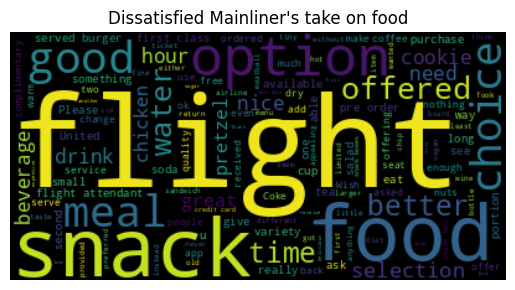

In [ ]:
imp_series = merge_2[(merge_2['fleet_usage_x'] =='Mainline') & (merge_2['satisfaction_type'] =='Dissatisfied')]['verbatim_text'].drop_duplicates()
text_imp_series = ' '.join(imp_series.tolist())
text_imp_series
wordcloud = WordCloud().generate(text_imp_series)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Dissatisfied Mainliner's take on food")
plt.show()

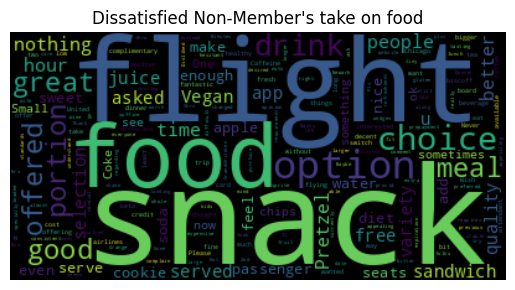

In [ ]:
imp_series = merge_2[(merge_2['response_group_x'] =='non-member') & (merge_2['satisfaction_type'] =='Dissatisfied')]['verbatim_text'].drop_duplicates()
text_imp_series = ' '.join(imp_series.tolist())
text_imp_series
wordcloud = WordCloud().generate(text_imp_series)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Dissatisfied Non-Member's take on food")
plt.show()

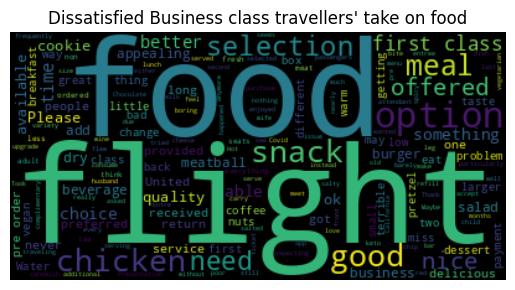

In [ ]:
imp_series = merge_2[(merge_2['cabin_code_desc'] =='Business') & (merge_2['satisfaction_type'] =='Dissatisfied')]['verbatim_text'].drop_duplicates()
text_imp_series = ' '.join(imp_series.tolist())
text_imp_series
wordcloud = WordCloud().generate(text_imp_series)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Dissatisfied Business class travellers' take on food")
plt.show()

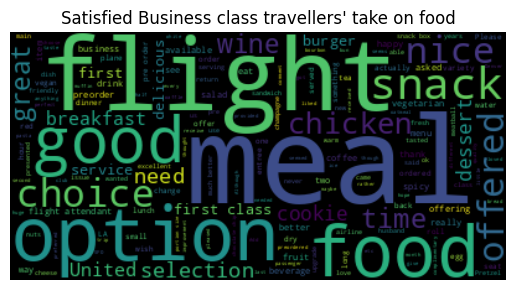

In [ ]:
imp_series = merge_2[(merge_2['cabin_code_desc'] =='Business') & (merge_2['satisfaction_type'] =='Satisfied')]['verbatim_text'].drop_duplicates()
text_imp_series = ' '.join(imp_series.tolist())
text_imp_series
wordcloud = WordCloud().generate(text_imp_series)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Satisfied Business class travellers' take on food")
plt.show()

In [ ]:
merge_2[(merge_2['cabin_code_desc'] =='Business') & (merge_2['satisfaction_type'] =='Satisfied')]['verbatim_text'].drop_duplicates()

13      Would like to see a more meal selection, bette...
19      I and my wife did not partake in the complimen...
41      The flight attendant was hard working and frie...
48      Tje Brioche cheeseburger is really good, but k...
75         Need more GF and Vegan options on all flights.
                              ...                        
3305    Seats are very uncomfortable and narrow with v...
3308    It would be nice to have a sandwich or lighter...
3318    As we all know, Champagne is the name designat...
3328    My first class flight attendant that served my...
3373    It would be nice to have a vegan dessert with ...
Name: verbatim_text, Length: 226, dtype: object

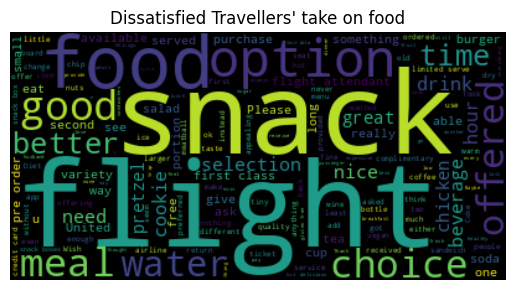

In [ ]:
imp_series = merge_2[(merge_2['satisfaction_type'] =='Dissatisfied')]['verbatim_text'].drop_duplicates()
text_imp_series = ' '.join(imp_series.tolist())
text_imp_series
wordcloud = WordCloud().generate(text_imp_series)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Dissatisfied Travellers' take on food")
plt.show()

## Observations
It is visible that several words like
- Flight Attendant
- Options
- Snacks
- Choices
- Available

occurs frequently showing that there were not enough options available or flight attendants failed to deliver the orders



In [ ]:
imp_series.values

array(['Hot food options would be nice.', 'no.',
       'Would like to see a more meal selection, better snacks. like nuts/fruit etc.',
       'I and my wife did not partake in the complimentary meal that was served. However, we did not receive anything else until we asked for a few snacks. Attendent needed to be more attentive to this.',
       'should give out bottles of water vs cups on a long flight.',
       'Too little choice, Burger was greasy.',
       'Change it up more frequently. Gets boring and unappealing.',
       'Would like to see a more consistent snack. Pretzels sometimes does not make thru the whole flight.',
       'The food choices are all unappetizing.',
       'Good service from flight attendents.',
       'Please offer sugar free organic options. I do really appreciate the sparkling water choices.',
       'No.', 'Water tasted bad.',
       'It is was good…. Not great. But ok, nothing to complain about.',
       'What was the purpose of pre-order when the attend

In [ ]:
df = is_inventory_df.groupby('entree_code').sum().sort_values('difference_entree_count',ascending = False)['difference_entree_count'][:10]
df = df.to_frame()
df.reset_index(inplace = True)

<ipython-input-147-1ba0be5fe7c7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = is_inventory_df.groupby('entree_code').sum().sort_values('difference_entree_count',ascending = False)['difference_entree_count'][:10]


[Text(0.5, 1.0, 'Surplus Inventory Forecasting Vs Food Code')]

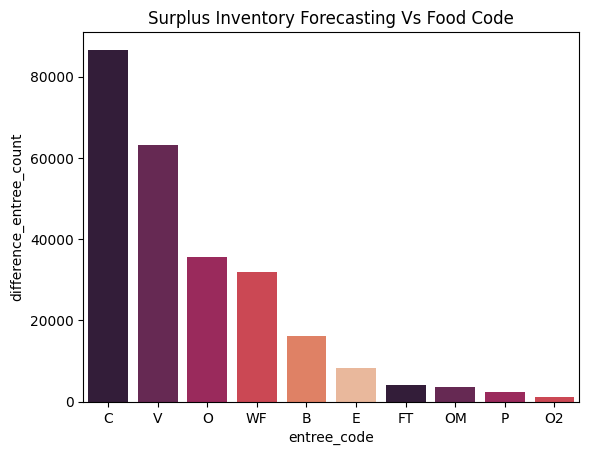

In [ ]:
sns.barplot(df, x = 'entree_code', y = 'difference_entree_count',palette = sns.color_palette('rocket')).set(title = 'Surplus Inventory Forecasting Vs Food Code')

In [ ]:
df.head()

,entree_code,difference_entree_count
0,C,86625
1,V,63076
2,O,35637
3,WF,31985
4,B,16130


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['difference_entree_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['difference_entree_count'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['entree_code'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['difference_entree_count', 'entree_code'], **{'inner': 'stick'})
chart